In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory =  "forward/Karim/" # "backward/subj0/"

feedback_blocks_dict = {
    "forward/Karim/": {
        'No': [1, 2, 3], 
        'Small': [4, 5, 6],
        'Medium': [7, 8, 9],
        'Large': [10, 11, 12],
        'No 2': [13, 14, 15]}  # After-Effect?
}

noises =  [(0,0), (1, 2), (3,4), (5,6), (0,0)]

In [3]:
geometry_specs = np.loadtxt(directory + "geometry_specs.csv", delimiter=',')
print(geometry_specs)

SCREEN_WIDTH, SCREEN_HEIGHT = geometry_specs[0], geometry_specs[1]
TABLE_WIDTH = SCREEN_WIDTH - 100
TABLE_HEIGHT = int(SCREEN_HEIGHT * 0.9)
ZONE_WIDTH = int(TABLE_WIDTH * 0.95)
ZONE_HEIGHT = 150
TABLE_RECT = [(SCREEN_WIDTH - TABLE_WIDTH) // 2, (SCREEN_HEIGHT - TABLE_HEIGHT) // 2, TABLE_WIDTH, TABLE_HEIGHT]
SCORING_RECT = [(SCREEN_WIDTH - ZONE_WIDTH) // 2, int(TABLE_HEIGHT * 0.2), ZONE_WIDTH, ZONE_HEIGHT]

[1470.  956.]


In [4]:
trial_positions = np.loadtxt(directory + 'trial_positions.csv', delimiter=',')
print(trial_positions[:4])

# TODO: extract and do for each feedback type
def get_xy_coords(trial_positions, first_block = 1, end_block = 3):
    blocks = []
    for block in range(first_block, end_block + 1):
        block_positions = trial_positions[trial_positions[:, -1] == block]
        x, y = block_positions[:, 0], block_positions[:, 1]
        blocks.append((x, y))
    return blocks

[[299.97925504 421.97925504   1.        ]
 [233.94863023 288.89516035   1.        ]
 [401.34038975 550.86319121   1.        ]
 [318.68152682 451.18254183   1.        ]]


In [5]:
def plot_feedback_type(axis, xy_coords):
    # Add shaded regions
    top_left_x_coord, top_left_y_coord = SCORING_RECT[0], SCORING_RECT[1]
    width, height = SCORING_RECT[2], SCORING_RECT[3]
    x_shaded = np.linspace(0, width, 100)
    y_shaded = (top_left_y_coord + height) - height / width * x_shaded # Example equation
    axis.fill_between(x_shaded + top_left_x_coord, y_shaded, top_left_y_coord, color='green', alpha=0.3)
    axis.fill_between(x_shaded + top_left_x_coord, y_shaded, top_left_y_coord + height, color='red', alpha=0.3)

    # Draw outer rectangle
    top_left_x_coord, top_left_y_coord = TABLE_RECT[0], TABLE_RECT[1]
    width, height = TABLE_RECT[2], TABLE_RECT[3]
    axis.plot([top_left_x_coord, top_left_x_coord + width, top_left_x_coord + width, top_left_x_coord, top_left_x_coord], 
            [top_left_y_coord, top_left_y_coord, top_left_y_coord + height,  top_left_y_coord + height, top_left_y_coord], color='brown', lw=2, linestyle="-")

    for (x, y), color, label in zip(xy_coords, ["purple", "blue", "orange"], ['1. Block (Unperturbed)', '2. Block (Perturbed)', '3. Block (Unperturbed)']):
        axis.scatter(x, y, color=color, label=label, alpha=0.8)

    axis.grid(True)

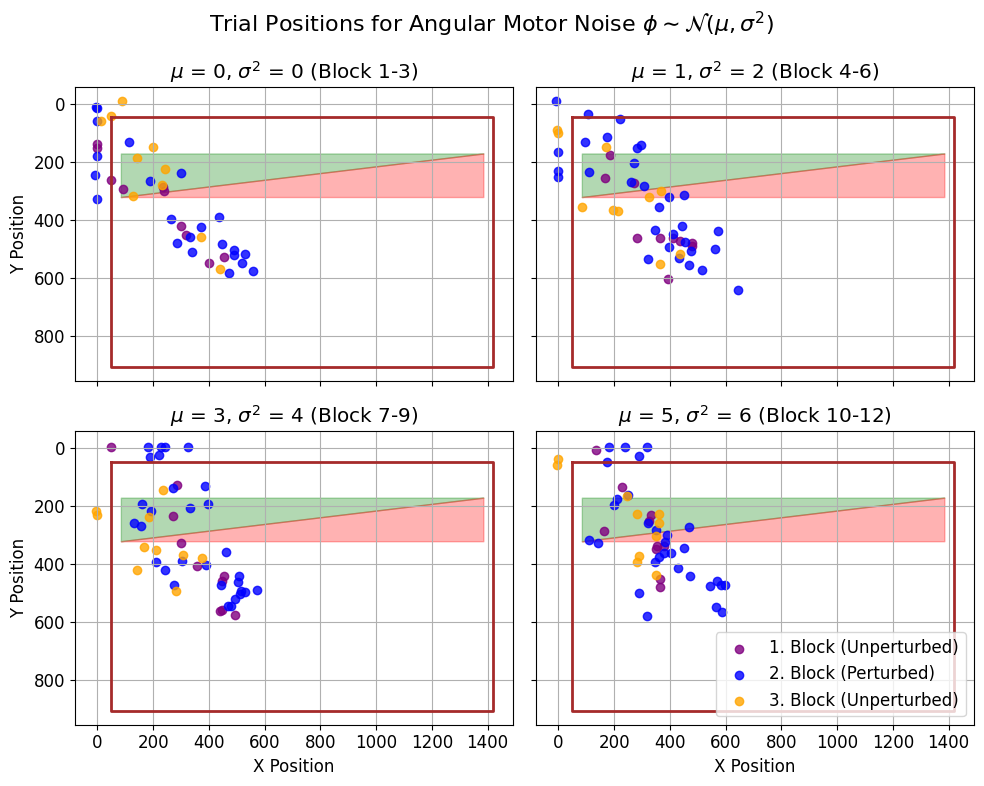

In [6]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

plt.suptitle(r"Trial Positions for Angular Motor Noise $\phi \sim \mathcal{N}(\mu, \sigma^2)$", fontsize=16)
for idx, ((feedback_type, blocks), noise) in enumerate(zip(feedback_blocks_dict[directory].items(), noises)):
    if idx < 4:
        xy_coords = get_xy_coords(trial_positions=trial_positions, first_block=blocks[0], end_block=blocks[-1])
        axes[idx // 2, idx % 2].set_title(r"$\mu$ = {}, $\sigma^2$ = {} (Block {}-{})".format(noise[0], noise[1], blocks[0], blocks[-1]))
        plot_feedback_type(axes[idx // 2, idx % 2], xy_coords=xy_coords)

axes[0, 0].invert_yaxis()
axes[1, 1].legend(loc = "lower right")
axes[1, 0].set_xlabel('X Position')
axes[1, 1].set_xlabel('X Position')
axes[0, 0].set_ylabel('Y Position')
axes[1, 0].set_ylabel('Y Position')

plt.tight_layout()
plt.savefig(directory + 'scatter_plot.png')
plt.show()

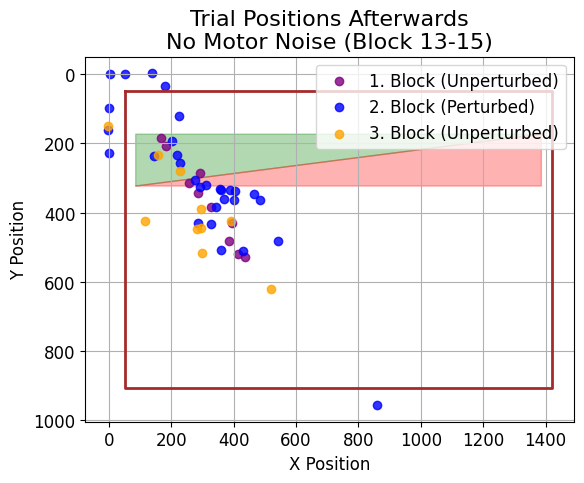

In [7]:
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(1, 1, figsize=(6, 5))

xy_coords = get_xy_coords(trial_positions=trial_positions, first_block=13, end_block=15)
axes.set_title("Trial Positions Afterwards\n" + "No Motor Noise (Block 13-15)", fontsize=16)
plot_feedback_type(axes, xy_coords=xy_coords)

axes.invert_yaxis()
axes.legend(loc = "upper right")
axes.set_xlabel('X Position')
axes.set_ylabel('Y Position')

plt.tight_layout()
plt.savefig(directory + 'scatter_plot_2.png')
plt.show()

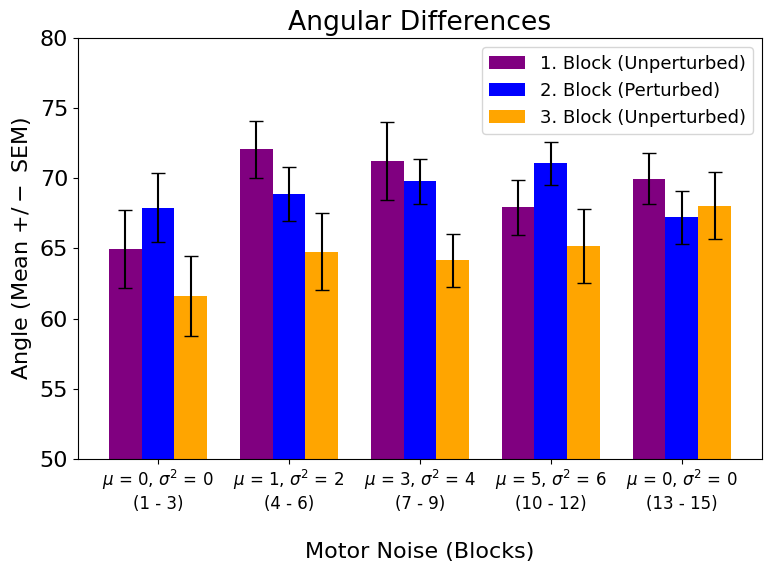

In [32]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.5
x_ticks_per_group = np.arange(5) * 2
x_ticks_per_block = np.array([-1, 0, +1]) * bar_width

colors = ["purple", "blue", "orange"]
legend_labels = ['1. Block (Unperturbed)', '2. Block (Perturbed)', '3. Block (Unperturbed)']

top_left_x_coord, top_left_y_coord = TABLE_RECT[0], TABLE_RECT[1]
width, height = TABLE_RECT[2], TABLE_RECT[3]
start_point = np.array([top_left_x_coord + width / 2, top_left_x_coord - height])

x_labels = []
for idx, (x_tick_per_group, (feedback_type, blocks), noise) in enumerate(zip(x_ticks_per_group, feedback_blocks_dict[directory].items(), noises)):
    x_label = r"$\mu$ = {}, $\sigma^2$ = {}".format(noise[0], noise[1]) + "\n({} - {})".format(blocks[0], blocks[-1])
    x_labels.append(x_label)
    xy_coords = get_xy_coords(trial_positions=trial_positions, first_block=blocks[0], end_block=blocks[-1])
    for x_tick_per_block, (x, y), color, legend_label in zip(x_ticks_per_block, xy_coords, colors, legend_labels):
        angles = 180 - np.arctan2(y - start_point[1], x - start_point[0]) * 180 / np.pi
        means = np.mean(angles)
        sems = np.std(angles) / np.sqrt(len(angles))
        ax.bar(x_tick_per_group + x_tick_per_block, means, bar_width, yerr=sems, capsize=5, label = legend_label if idx == 0 else None, color=color)

# Add labels and title
ax.set_ylabel(r'Angle (Mean $+/-$ SEM)')
ax.set_ylim([50, 80])
ax.set_xlabel("\nMotor Noise (Blocks)")
ax.set_xticks(x_ticks_per_group)
ax.set_xticklabels(x_labels, fontsize=12)
ax.legend(loc="upper right", fontsize = 13)
plt.title("Angular Differences")
plt.tight_layout()
plt.savefig(directory + 'angle_plot.png')
plt.show()

In [38]:
# plot the covariance for final positions of the blocks

def plot_covariance_matrix(cov_matrix, title):
    
    fig, ax = plt.subplots()
    cax = ax.matshow(cov_matrix, cmap='coolwarm')
    fig.colorbar(cax)

    ax.set_xticks(np.arange(cov_matrix.shape[0]))
    ax.set_yticks(np.arange(cov_matrix.shape[1]))

    ax.set_xticklabels(['X', 'Y'])
    ax.set_yticklabels(['X', 'Y'])

    plt.title(title)
    plt.tight_layout()
    # plt.savefig(directory + 'covariance_matrix.png')
    plt.show()
    
def get_covariance_matrix(trial_positions, first_block = 1, end_block = 3):
    blocks = []
    for block in range(first_block, end_block + 1):
        block_positions = trial_positions[trial_positions[:, -1] == block]
        x, y = block_positions[:, 0], block_positions[:, 1]
        blocks.append((x, y))
        print(blocks)
    cov_matrix = np.cov(blocks)
    return cov_matrix

cov_matrix = get_covariance_matrix(trial_positions=trial_positions, first_block=1, end_block=3)
plot_covariance_matrix(cov_matrix, title="Covariance Matrix for Blocks 1-3")


[(array([299.97925504, 233.94863023, 401.34038975, 318.68152682,
        89.95613266, 453.33846477,  -1.66244455,  48.72928859,
        -2.77257725, 237.62936219]), array([421.97925504, 288.89516035, 550.86319121, 451.18254183,
       292.60261218, 528.34442047, 151.81042079, 264.08790133,
       139.29363343, 302.39619504]))]
[(array([299.97925504, 233.94863023, 401.34038975, 318.68152682,
        89.95613266, 453.33846477,  -1.66244455,  48.72928859,
        -2.77257725, 237.62936219]), array([421.97925504, 288.89516035, 550.86319121, 451.18254183,
       292.60261218, 528.34442047, 151.81042079, 264.08790133,
       139.29363343, 302.39619504])), (array([490.61141684, 520.15651205, 264.28055337,  -2.01342862,
       332.77541253, 299.87293236, 189.38960335, 559.27295439,
       286.15122068, 445.54755676,  -1.17757709, 528.76458355,
       470.50626523,  -1.13987473, 370.89613337,  -9.45082639,
       488.60565214, 113.21605146,  -4.14631433, 435.58150423,
        -1.55543915, 339.2

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3, 2) + inhomogeneous part.

In [31]:
x, y = xy_coords[2]
x.shape

(10,)

In [13]:
directory

'forward/Karim/'

In [9]:
cum_scores = np.loadtxt(directory + 'scores.csv', delimiter=',')
print(cum_scores[:4])

# TODO: extract and do for each feedback type
def get_scores(scores, trial_positions, first_block = 1, end_block = 3):
    blocks = []
    for block in range(first_block, end_block + 1):
        cum_block_scores = scores[trial_positions[:, -1] == block]
        block_scores = np.diff(cum_block_scores)
        blocks.append(block_scores)
    return np.concatenate(blocks)

[ 0. 86. 86. 86.]


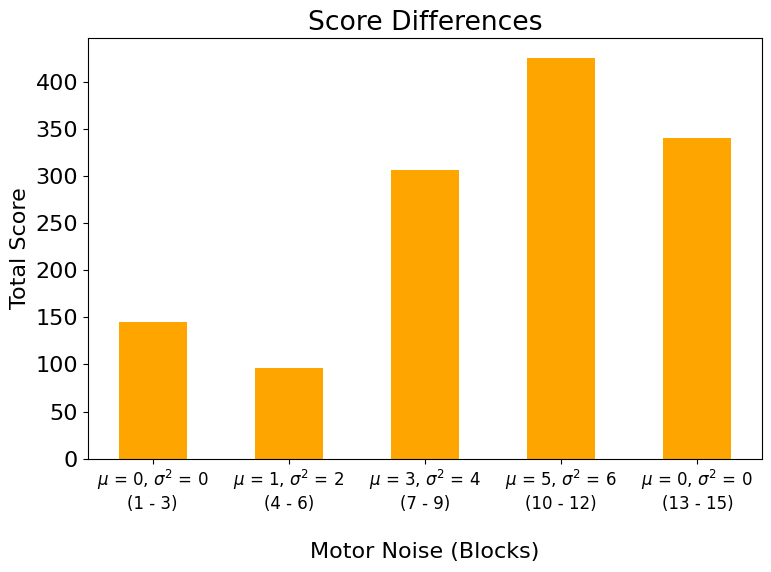

In [10]:
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 1
x_ticks_per_group = np.arange(5) * 2
x_ticks_per_block = np.array([-1, 0, +1]) * bar_width

colors = ["purple", "blue", "orange"]
legend_labels = ['1. Block (Unperturbed)', '2. Block (Perturbed)', '3. Block (Unperturbed)']

top_left_x_coord, top_left_y_coord = TABLE_RECT[0], TABLE_RECT[1]
width, height = TABLE_RECT[2], TABLE_RECT[3]
start_point = np.array([top_left_x_coord + width / 2, top_left_x_coord - height])

x_labels = []
for idx, (x_tick_per_group, (feedback_type, blocks), noise) in enumerate(zip(x_ticks_per_group, feedback_blocks_dict[directory].items(), noises)):
    x_label = r"$\mu$ = {}, $\sigma^2$ = {}".format(noise[0], noise[1]) + "\n({} - {})".format(blocks[0], blocks[-1])
    x_labels.append(x_label)
    score = get_scores(cum_scores, trial_positions, first_block=blocks[0], end_block=blocks[-1])
    mean = np.sum(score)
    ax.bar(x_tick_per_group, mean, bar_width, color="orange")

# Add labels and title
ax.set_ylabel(r'Total Score')
# ax.set_ylim([0, 10])
ax.set_xlabel("\nMotor Noise (Blocks)")
ax.set_xticks(x_ticks_per_group)
ax.set_xticklabels(x_labels, fontsize=12)
plt.title("Score Differences")
plt.tight_layout()
plt.savefig(directory + 'score_plot.png')
plt.show()